<a href="https://colab.research.google.com/github/Taimaaaa/Preparing-Time-Series-from-Wide-Form-Data/blob/main/Preparing_Time_Series_from_Wide%E2%80%94Form_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Time Series from Wide—Form Data
* Author: Taima Nasser

##Imports & Loading

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [16]:
# load the Zillow dataset
df = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# preview structure
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


##Filtering the 4 Largest Cities & Melting Data

In [17]:
# filter the 4 largest cities
top_cities = df[df["SizeRank"].isin([0, 1, 2, 3])].copy()

# verify selected cities
top_cities[["RegionName", "SizeRank"]]

,RegionName,SizeRank
0,New York,0
1,Los Angeles,1
2,Houston,2
3,Chicago,3


In [18]:
# identify non-date (id) columns
id_cols = [
    "RegionID",
    "SizeRank",
    "RegionName",
    "RegionType",
    "StateName",
    "State",
    "Metro",
    "CountyName"
]

# melt wide-form data to long-form
zillow_long = pd.melt(
    top_cities,
    id_vars=id_cols,
    var_name="Date",
    value_name="HomeValue"
)

zillow_long.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


##Convert Date Column to Datetime

In [19]:
# convert Date column to datetime
zillow_long["Date"] = pd.to_datetime(zillow_long["Date"])

# verify conversion
zillow_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


##Set Datetime Index

In [20]:
# set Date as index
zillow_long = zillow_long.set_index("Date")

# sort to ensure proper time order
zillow_long = zillow_long.sort_index()

zillow_long.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


##Resample to Monthly Frequency Grouped by City

In [21]:
# group by city and resample monthly
zillow_ts = (
    zillow_long
    .groupby("RegionName")
    .resample("MS")
    .mean(numeric_only=True)
)

zillow_ts.head(20)

RegionID  SizeRank  HomeValue
RegionName Date                                     
Chicago    2000-01-01   17426.0       3.0   166139.0
           2000-02-01   17426.0       3.0   166536.0
           2000-03-01   17426.0       3.0   167368.0
           2000-04-01   17426.0       3.0   168826.0
           2000-05-01   17426.0       3.0   170499.0
           2000-06-01   17426.0       3.0   172008.0
           2000-07-01   17426.0       3.0   173598.0
           2000-08-01   17426.0       3.0   175282.0
           2000-09-01   17426.0       3.0   176928.0
           2000-10-01   17426.0       3.0   178634.0
           2000-11-01   17426.0       3.0   180479.0
           2000-12-01   17426.0       3.0   182259.0
           2001-01-01   17426.0       3.0   183890.0
           2001-02-01   17426.0       3.0   185143.0
           2001-03-01   17426.0       3.0   186789.0
           2001-04-01   17426.0       3.0   188315.0
           2001-05-01   17426.0       3.0   190058.0
           2001-06-01   17426.0       3.0   191482.0
           2001-07-01   17426.0       3.0   192933.0
           2001-08-01   17426.0       3.0   194629.0

In [22]:
# confirm multi-index structure
zillow_ts.index.names

FrozenList(['RegionName', 'Date'])

##Unstack the Time Series for Visualization


* Current structure: MultiIndex (RegionName, Date)

* We unstack so each city becomes a column

* Index remains datetime

In [23]:
# unstack so each city is its own column
zillow_wide = zillow_ts["HomeValue"].unstack("RegionName")

zillow_wide.head()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-01,166139.0,109068.0,234181.0,253690.0
2000-02-01,166536.0,109079.0,234401.0,255517.0
2000-03-01,167368.0,108878.0,235513.0,257207.0
2000-04-01,168826.0,108881.0,237589.0,260310.0
2000-05-01,170499.0,108834.0,240113.0,263204.0


##Plot Home Values for All 4 Cities

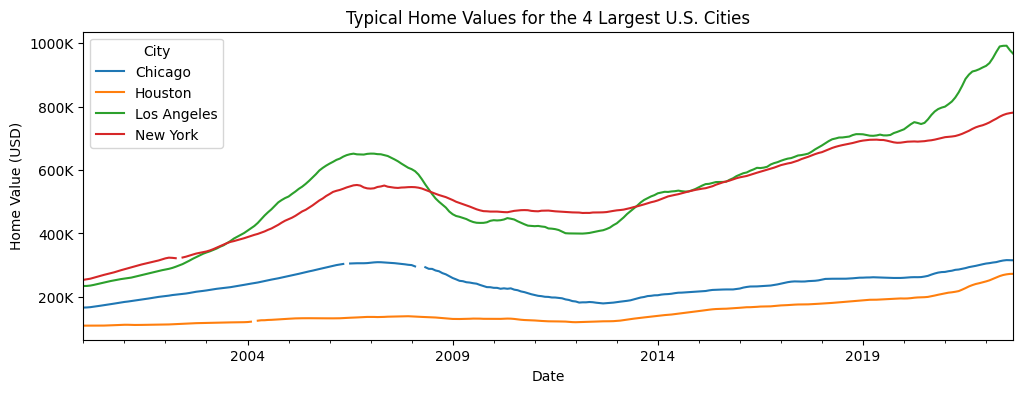

In [25]:
# formatter for thousands (e.g. 200K)
def thousands_formatter(x, pos):
    return f"{int(x/1000)}K"

fig, ax = plt.subplots(figsize=(12, 4))

# plot all cities
zillow_wide.plot(ax=ax)

# titles and labels
ax.set_title("Typical Home Values for the 4 Largest U.S. Cities")
ax.set_xlabel("Date")
ax.set_ylabel("Home Value (USD)")

# format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax.legend(title="City")
plt.show()

###Which city had the highest and lowest home value at the end of 2008?

In [26]:
# select December 2008
dec_2008 = zillow_wide.loc["2008-12-01"]

dec_2008

,2008-12-01
RegionName,
Chicago,265306.0
Houston,131283.0
Los Angeles,469294.0
New York,510309.0


In [27]:
# highest and lowest cities
highest_city = dec_2008.idxmax()
lowest_city = dec_2008.idxmin()

highest_value = dec_2008.max()
lowest_value = dec_2008.min()

highest_city, highest_value, lowest_city, lowest_value

('New York', 510309.0, 'Houston', 131283.0)

###How much did home values change from November 2008 to December 2008?

In [28]:
# select Nov and Dec 2008
nov_dec_2008 = zillow_wide.loc["2008-11-01":"2008-12-01"]

nov_dec_2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-01,271059.0,132247.0,481905.0,514767.0
2008-12-01,265306.0,131283.0,469294.0,510309.0


In [29]:
# calculate month-to-month change
change = nov_dec_2008.diff()

# keep December changes only
dec_change = change.loc["2008-12-01"]

dec_change

,2008-12-01
RegionName,
Chicago,-5753.0
Houston,-964.0
Los Angeles,-12611.0
New York,-4458.0
